In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
# File to Load (Remember to Change These)
mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data)  #contains Mouse ID and Drug regimen
clinical_trial_df = pd.read_csv(clinical_trial_data) #contains trial data

In [3]:
# Combine the data into a single dataset  - combine on "Mouse ID"
mouse_clinical_df = pd.merge(mouse_drug_df,clinical_trial_df)
# Display the data table for preview
mouse_clinical_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint # Convert to DataFrame using reset_index()
tumor_response_mean = mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
#rename column title adding in unicode charater mu for mean 
tumor_response_mean.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) \u03BC'}, inplace = True)
# Preview DataFrame
tumor_response_mean.head()

,Drug,Timepoint,Tumor Volume (mm3) μ
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint  # Convert to DataFrame
tumor_response_sem = mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
#rename column title adding in SEM for standard error mean  
tumor_response_sem.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) SEM'}, inplace = True)
# Preview DataFrame
tumor_response_sem.head()


,Drug,Timepoint,Tumor Volume (mm3) SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
# Pivot the tumor volume means
tumor_response_pivot_mean = tumor_response_mean.pivot(index = 'Timepoint', columns = 'Drug', values= 'Tumor Volume (mm3) \u03BC')
tumor_response_pivot_mean.head(3)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881


In [7]:
# Pivot the tumor volume SEM
tumor_response_pivot_sem = tumor_response_sem.pivot(index = 'Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3) SEM')
tumor_response_pivot_sem.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949


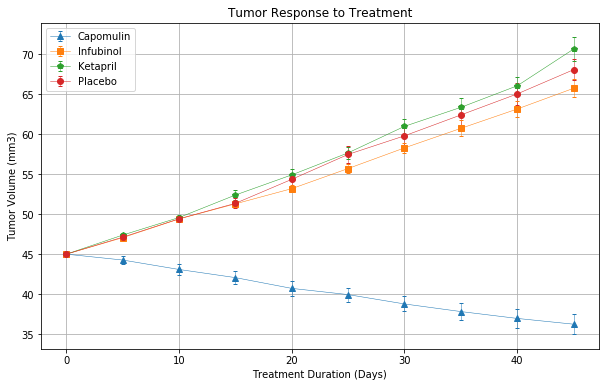

In [8]:
# Generate the Plot (with Error Bars)
#select and plot subsets "Capomulin","Infubinol","Ketapril","Placebo"
fig, ax = plt.subplots(figsize = (10,6))
ax.errorbar(tumor_response_pivot_mean.index,tumor_response_pivot_mean.Capomulin, yerr = tumor_response_pivot_sem.Capomulin,linestyle = "-",linewidth = .5, fmt = "^",capsize = 2)
ax.errorbar(tumor_response_pivot_mean.index,tumor_response_pivot_mean.Infubinol, yerr = tumor_response_pivot_sem.Infubinol,linestyle = "-",linewidth = .5, fmt = "s",capsize = 2)
ax.errorbar(tumor_response_pivot_mean.index,tumor_response_pivot_mean.Ketapril, yerr = tumor_response_pivot_sem.Ketapril,linestyle = "-",linewidth = .5, fmt = "p",capsize = 2)
ax.errorbar(tumor_response_pivot_mean.index,tumor_response_pivot_mean.Placebo, yerr = tumor_response_pivot_sem.Placebo,linestyle = "-",linewidth =.5, fmt = "o",capsize = 2)            

#Set up the plot
plt.title("Tumor Response to Treatment")
plt.legend(loc = "best")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig('tumor_response.png')


## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint # Convert to DataFrame using reset_index()
metastatic_response_mean = mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()
#rename column title adding in unicode charater mu for mean 
metastatic_response_mean.rename(columns={'Metastatic Sites':'Metastatic Site \u03BC' }, inplace = True)
# Preview DataFrame
metastatic_response_mean.head()

,Drug,Timepoint,Metastatic Site μ
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint # Convert to DataFrame
metastatic_response_sem = mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()
#rename column title adding in SEM for standard error mean  
metastatic_response_sem.rename(columns={'Metastatic Sites': 'Metastatic Site SEM'}, inplace = True)
# Preview DataFrame
metastatic_response_sem.head()


,Drug,Timepoint,Metastatic Site SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
# Pivot the metastat site means
metastatic_response_pivot_mean = metastatic_response_mean.pivot(index = 'Timepoint', columns = 'Drug', values= 'Metastatic Site \u03BC')
# Preview that reformat worked
metastatic_response_pivot_mean.head(3)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000
5,0.16,0.380952,0.280000,0.304348,0.26087,0.375000,0.320000,0.12,0.240000,0.166667
10,0.32,0.600000,0.666667,0.590909,0.52381,0.833333,0.565217,0.25,0.478261,0.500000


In [12]:
# Minor Data Munging to Re-Format the Data Frames
# Pivot the metastat site SEM
metastatic_response_pivot_sem = metastatic_response_sem.pivot(index = 'Timepoint', columns = 'Drug', values= 'Metastatic Site SEM')
# Preview that reformat worked
metastatic_response_pivot_sem.head(3)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109


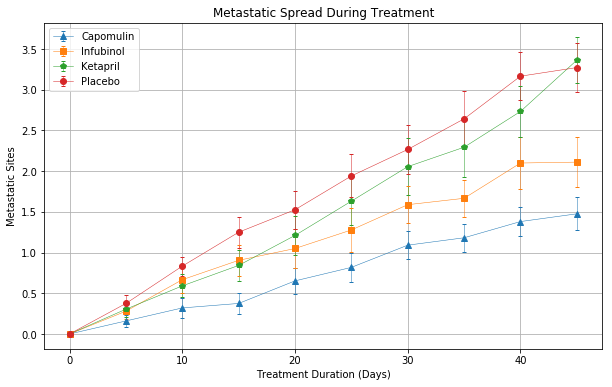

In [13]:
# Generate the Plot (with Error Bars)
#select and plot subsets "Capomulin","Infubinol","Ketapril","Placebo"
fig, ax = plt.subplots(figsize = (10,6))
ax.errorbar(metastatic_response_pivot_mean.index,metastatic_response_pivot_mean.Capomulin, yerr = metastatic_response_pivot_sem.Capomulin,linestyle = "-",linewidth = .5, fmt = "^",capsize = 2)
ax.errorbar(metastatic_response_pivot_mean.index,metastatic_response_pivot_mean.Infubinol, yerr = metastatic_response_pivot_sem.Infubinol,linestyle = "-",linewidth = .5, fmt = "s",capsize = 2)
ax.errorbar(metastatic_response_pivot_mean.index,metastatic_response_pivot_mean.Ketapril, yerr = metastatic_response_pivot_sem.Ketapril,linestyle = "-",linewidth = .5, fmt = "p",capsize = 2)
ax.errorbar(metastatic_response_pivot_mean.index,metastatic_response_pivot_mean.Placebo, yerr = metastatic_response_pivot_sem.Placebo,linestyle = "-",linewidth =.5, fmt = "o",capsize = 2)            

#Set up the plot
plt.title("Metastatic Spread During Treatment")
plt.legend(loc = "best")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()

# Save the Figure
plt.savefig('metastatic_response.png')


## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint ?(W can pass any metric)?# Convert to DataFrame
survival_rate = mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count().reset_index()
survival_rate["Survival Rate %"] = (survival_rate['Mouse ID'] / 25 * 100)
survival_rate.style.format({"Survival Rate %" : "{:.2%}"})
survival_rate.rename(columns = {"Mouse ID" : "Mouse Count" }, inplace = True)
# Preview DataFrame
survival_rate.head()

,Drug,Timepoint,Mouse Count,Survival Rate %
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


In [15]:
# Minor Data Munging to Re-Format the Data Frames
# Pivot the Mouse Count
survival_rate = survival_rate.pivot(index = 'Timepoint', columns = 'Drug', values= 'Survival Rate %')

# Preview that reformat worked
survival_rate.head(25)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


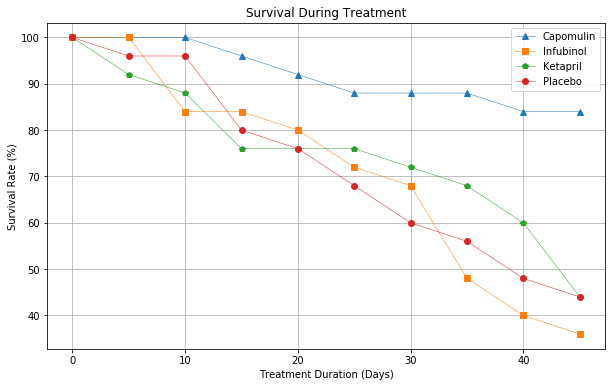

In [16]:
# Generate the Plot (Accounting for percentages)
#select and plot subsets "Capomulin","Infubinol","Ketapril","Placebo"
fig, ax = plt.subplots(figsize = (10,6))
ax.errorbar(survival_rate.index,survival_rate.Capomulin, linestyle = "-",linewidth = .5, fmt = "^")
ax.errorbar(survival_rate.index,survival_rate.Infubinol, linestyle = "-",linewidth = .5, fmt = "s")
ax.errorbar(survival_rate.index,survival_rate.Ketapril, linestyle = "-",linewidth = .5, fmt = "p")
ax.errorbar(survival_rate.index,survival_rate.Placebo, linestyle = "-",linewidth =.5, fmt = "o")     

#Set up the plot
plt.title("Survival During Treatment")
plt.legend(loc = "best")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()

# Save the Figure
plt.savefig('Survival_rate.png')

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint # Convert to DataFrame using reset_index()
tumor_response_mean_pct =(mouse_clinical_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index())
#rename column title adding in unicode charater mu for mean 
tumor_response_mean_pct.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume (mm3) \u03BC'}, inplace = True)


# Display the dataframe
tumor_response_mean_pct.head(5)

,Drug,Timepoint,Tumor Volume (mm3) μ
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [18]:
# Minor Data Munging to Re-Format the Data Frames
# Pivot the tumor volume means
tumor_response_mean_pct = tumor_response_mean_pct.pivot(index = 'Timepoint', columns = 'Drug', values= 'Tumor Volume (mm3) \u03BC')
#tumor_response_mean.pct_change()
#tumor_response_mean_pct['Tumor Volume (mm3) \u03BC'].pct_change(periods = 9)

tumor_response_mean_pct.head(20)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [19]:
#tumor_response_mean.pct_change()
tumor_response_mean_pct_change = (tumor_response_mean_pct.pct_change(periods = 9) * 100).round(2)
#Display only row @ day 45
tumor_response_mean_pct_change.iloc[9].head(20)

Drug
Capomulin   -19.48
Ceftamin     42.52
Infubinol    46.12
Ketapril     57.03
Naftisol     53.92
Placebo      51.30
Propriva     47.24
Ramicane    -22.32
Stelasyn     52.09
Zoniferol    46.58
Name: 45, dtype: float64

In [20]:
# Select last row (45 days) of data and create new datframe
percent_change = pd.DataFrame(tumor_response_mean_pct_change.iloc[9])
percent_change.rename(columns = {45 : "Percent Change (%)" }, inplace = True)
#select subset "Capomulin","Infubinol","Ketapril","Placebo"
percent_change = percent_change.loc[['Capomulin','Infubinol','Ketapril','Placebo']]
# Display the data to confirm
percent_change.head(10)

,Percent Change (%)
Drug,
Capomulin,-19.48
Infubinol,46.12
Ketapril,57.03
Placebo,51.30


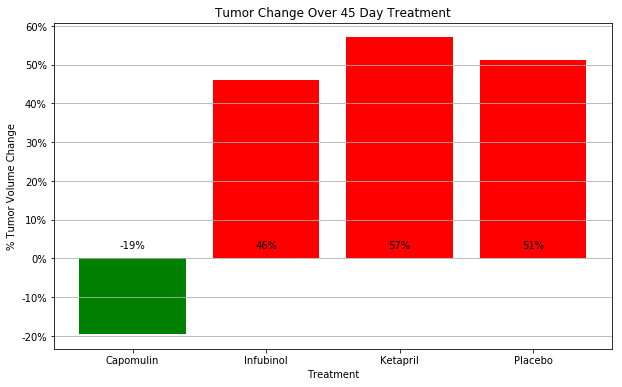

In [21]:
#Format bar color based on performance

#plot a bar chart
fig, ax = plt.subplots(figsize = (10,6))  #I'm having trouble understanding how this works... 
bars = ax.bar(percent_change.index,percent_change['Percent Change (%)'], color = ["green","red","red","red"]) # index set as xlabels

# Orient widths. Add labels, tick marks, etc. 
#Format the y axis as percentages
fmt = '%.0f%%' #Format for the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

#Add Titles
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Treatment")
plt.ylabel("% Tumor Volume Change")

#Add grid lines to y-axis only
ax.yaxis.grid(True)

#rects = ax.patches
#Add percent labels to the bars
def autolabel(bars):
    for rect in bars:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height -(height - 2),'%d' % int(height) + "%",color = "black", ha='center', va='bottom')
        
autolabel(bars)

# Save the Figure
plt.savefig('Tumor_Volume_Change.png')

# Show the Figure
fig.show()